In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data

Load the data

In [2]:
df=pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv')

Reverse the order of the data, some plottings will go better if the oldest dates are on top of the dataframe.

In [3]:
df=df.iloc[::-1]

Also, stripping out the year and turning the date into a string will simplify plotting.

In [4]:
df['Date']=df['date'].astype(str).str[5:]
df['DateTime']=pd.to_datetime(df['date'], format='%Y%m%d')

# Question 1:  How many states?

How many different "states" are there?

In [5]:
print(np.unique(df['state']))
print('There are %d unique state entries, must be including territories.'%len(np.unique(df['state'])))

['AK' 'AL' 'AR' 'AS' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'GU' 'HI'
 'IA' 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MP'
 'MS' 'MT' 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA'
 'PR' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA' 'WI' 'WV' 'WY']
There are 56 unique state entries, must be including territories.


# Question 2: Which 5 states have highest positive testing rate?

First we will make a new dataframe that has just the states, positives, negatives, and the positive fraction.

In [6]:
posneg=df.groupby(['state']).aggregate({'positive':np.max, 'negative':np.max}).reset_index()
posneg['PositiveRatio']=posneg['positive']/(posneg['positive']+posneg['negative'])
posneg.head()

,state,positive,negative,PositiveRatio
0,AK,9996.0,481175.0,0.020351
1,AL,161975.0,1042046.0,0.134528
2,AR,90145.0,1025546.0,0.080797
3,AS,0.0,1616.0,0.000000
4,AZ,223401.0,1312499.0,0.145453


Now find the 5 highest ratios.

In [7]:
posneg.sort_values(by='PositiveRatio', ascending=False)[0:5][['state', 'PositiveRatio']]

,state,PositiveRatio
42,PR,0.145964
4,AZ,0.145453
15,ID,0.139126
1,AL,0.134528
10,FL,0.132249


# Question 3:  Plot daily death toll for whole country

Let's plot daily death toll for the whole country.

Text(0.5, 1.0, 'US Daily Death Toll')

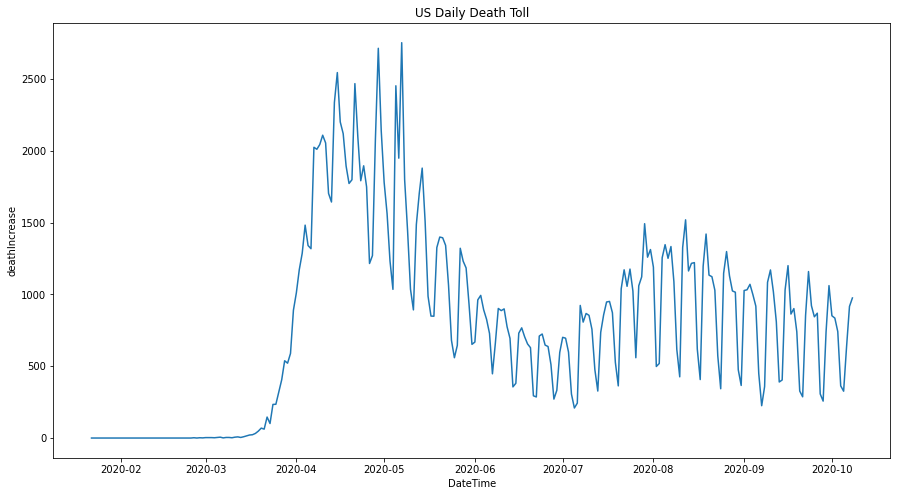

In [27]:
plt.figure(figsize=[15,8])
combined_df = df.pivot_table(index='DateTime', values='deathIncrease', aggfunc=np.sum).reset_index()
sns.lineplot(data=combined_df, x='DateTime', y='deathIncrease')
plt.title('US Daily Death Toll')

# Question 4:  Plot daily death toll for just Kansas and Missouri

Now let's focus on Missouri and Kansas, first we will graph their combined totals.

Text(0.5, 1.0, 'Missouri + Kansas Daily Death Toll')

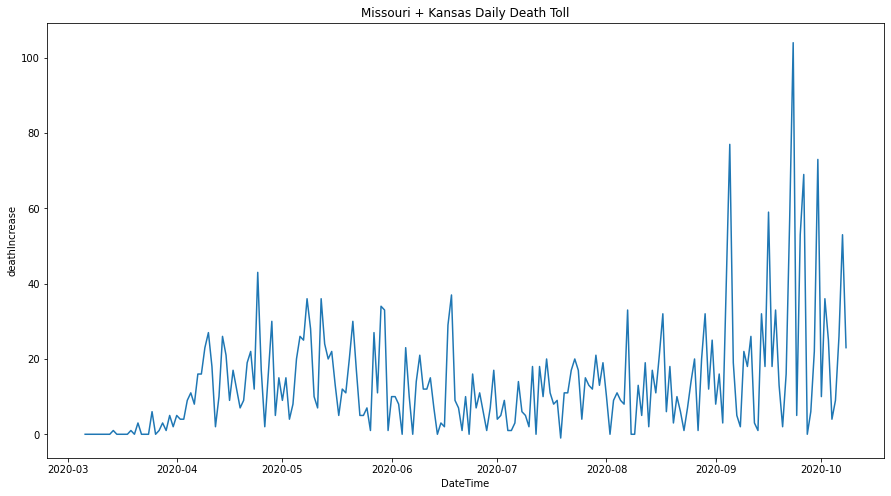

In [25]:
plt.figure(figsize=[15,8])
combined_df = df[df['state'].isin(['MO', 'KS'])].pivot_table(values='deathIncrease', 
                                                            aggfunc=np.sum, index='DateTime').reset_index()
sns.lineplot(data=combined_df, x='DateTime', y='deathIncrease')
plt.title('Missouri + Kansas Daily Death Toll')

Now let's separate them out.

Text(0.5, 1.0, 'Missouri and Kansas Daily Death Toll')

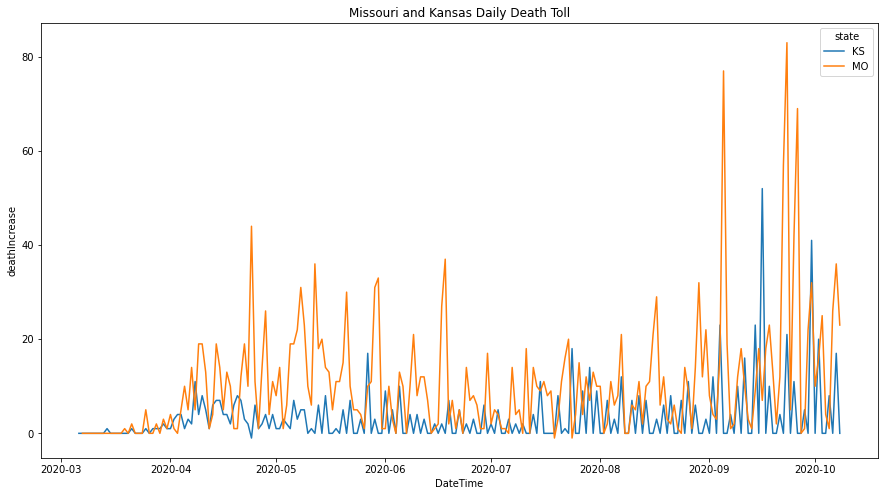

In [10]:
plt.figure(figsize=[15,8])
sns.lineplot(data=df[df['state'].isin(['MO', 'KS'])], x='DateTime', y='deathIncrease', hue='state')
plt.title('Missouri and Kansas Daily Death Toll')

# Question 5:  Plot the daily testing rate for Kansas and Missouri

What is the daily testing rate looking like for Kansas and Missouri?

Text(0.5, 1.0, 'Missouri + Kansas Daily Testings')

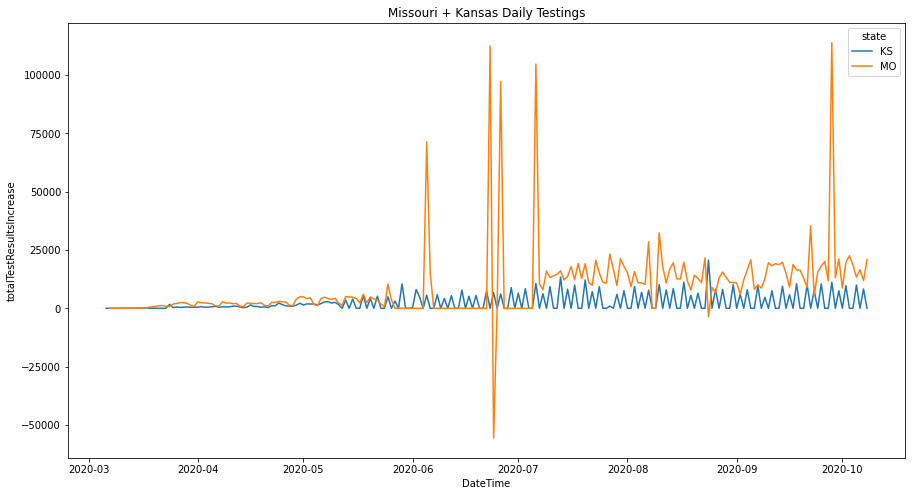

In [11]:
plt.figure(figsize=[15,8])
sns.lineplot(data=df[df['state'].isin(['MO', 'KS'])], x='DateTime', y='totalTestResultsIncrease', hue='state')
plt.title('Missouri + Kansas Daily Testings')

# Question 6:  What is the peak death day for the whole country?

In [29]:
agged_df = df.pivot_table(index='DateTime', values='deathIncrease', aggfunc=np.sum).reset_index()
agged_df.loc[np.argmax(agged_df['deathIncrease'])]

DateTime         2020-05-07 00:00:00
deathIncrease                   2752
Name: 106, dtype: object

So far it is May 7, on which 2752 died.

# Challenge 1:  Make a table of peak testing day for each state

In [30]:
df.groupby(['state']).apply(lambda x: x.iloc[np.argmax(x['totalTestResultsIncrease'])]).sort_values(by='DateTime')[['totalTestResultsIncrease','DateTime']]



,totalTestResultsIncrease,DateTime
state,,
ID,8188,2020-04-29
NJ,113486,2020-05-11
TN,54879,2020-06-12
AS,522,2020-06-25
PR,79467,2020-06-29
MP,2547,2020-07-08
AL,23846,2020-07-10
FL,98708,2020-07-12
VI,768,2020-07-17


# Challenge 2:  Plot the per capita testing fraction in descending order

First let's make a new dataframe that simply aggregates the total tests per state.

In [14]:
tests_agged=df.groupby(['state']).agg({'totalTestResultsIncrease':np.sum}).reset_index()

Now let's read in the population data, and keep only the parts we want.

In [15]:
pop=pd.read_csv('http://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv', usecols=['NAME', 'CENSUS2010POP'])

Now the problem is that our tests_agged has state abbreviations and our pop dataframe has full state names.  We need to convert one to the other before we can merge.

First let's load a file that has both.

In [16]:
abb=pd.read_csv('http://www.fonz.net/blog/wp-content/uploads/2008/04/states.csv')

Then we will make a dictionary that takes abbreviations and turns them into the full state names.

In [17]:
mapper={a:b for a,b in zip(abb['Abbreviation'], abb['State'])}

Now that we have a dictionary, we can create a new column in tests_agged and use .map to generate it.

In [18]:
tests_agged['StateNames']=tests_agged['state'].map(mapper)

Now we can merge the tests_agged and pop dataframes because they both have a column with the full state name in them.

In [19]:
tests_agged=tests_agged.merge(pop, left_on='StateNames', right_on='NAME')

Calculate the per 1000 tests, add to a column

In [20]:
tests_agged['PerThousand']=tests_agged['totalTestResultsIncrease']/tests_agged['CENSUS2010POP']*1000

Sort, show the top 5.

In [21]:
tests_agged.sort_values(by='PerThousand', ascending=False)[0:5].loc[:,['NAME', 'PerThousand']]

,NAME,PerThousand
28,North Dakota,983.072922
39,Rhode Island,816.507643
19,Massachusetts,693.612146
7,District of Columbia,692.694147
0,Alaska,691.553875


<AxesSubplot:xlabel='PerThousand', ylabel='NAME'>

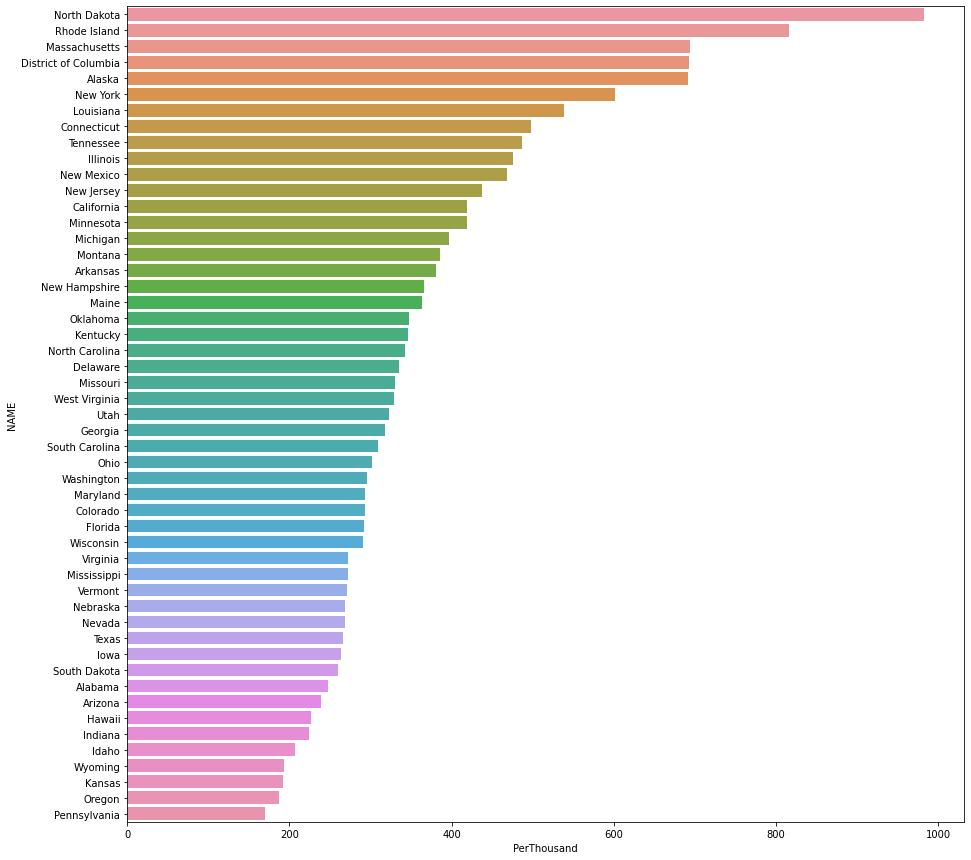

In [22]:
plt.figure(figsize=[15,15])
sns.barplot(data=tests_agged.sort_values(by='PerThousand', ascending=False), x='PerThousand', y='NAME')